# 2 - Data Cleaning

In [255]:
import pandas as pd
train_df = pd.read_csv('../data/housing_train.csv')
test_df = pd.read_csv('../data/housing_test.csv')

First I'm going to replace the '2207' value in `test_df['GarageYrBlt']` with 2007, because that is the most logical intended value when the data ends in 2010.

In [256]:
test_df.loc[((test_df[test_df['GarageYrBlt']==2207].index).tolist()), 'GarageYrBlt'] = 2007

There is an apparent relation between `MSSubClass` and `HouseStyle`. This is how they should match up:

1Story	One story
- 20	1-STORY 1946 & NEWER ALL STYLES
- 30	1-STORY 1945 & OLDER
- 40	1-STORY W/FINISHED ATTIC ALL AGES
- 120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER

1.5Fin	One and one-half story: 2nd level finished
- 50	1-1/2 STORY FINISHED ALL AGES
- 150	1-1/2 STORY PUD - ALL AGES

1.5Unf	One and one-half story: 2nd level unfinished
- 45	1-1/2 STORY - UNFINISHED ALL AGES

2Story	Two story
- 60	2-STORY 1946 & NEWER
- 70	2-STORY 1945 & OLDER
- 160	2-STORY PUD - 1946 & NEWER


2.5Fin	Two and one-half story: 2nd level finished<br>
2.5Unf	Two and one-half story: 2nd level unfinished
- 75	2-1/2 STORY ALL AGES

SFoyer	Split Foyer
- 85	SPLIT FOYER

SLvl	Split Level
- 80	SPLIT OR MULTI-LEVEL

Misc (No obvious floor number)
- 90	DUPLEX - ALL STYLES AND AGES
- 180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
- 190	2 FAMILY CONVERSION - ALL STYLES AND AGES

### Check for mismatches:<p>
Should be one story:

In [257]:
print('Train: \nCode 20\n',train_df[train_df['MSSubClass']==20]['HouseStyle'].value_counts(),'\n')
print('Code 30\n',train_df[train_df['MSSubClass']==30]['HouseStyle'].value_counts(),'\n')
print('Code 40\n',train_df[train_df['MSSubClass']==40]['HouseStyle'].value_counts(),'\n')
print('Code 120\n',train_df[train_df['MSSubClass']==120]['HouseStyle'].value_counts())

Train: 
Code 20
 HouseStyle
1Story    534
2Story      1
SLvl        1
Name: count, dtype: int64 

Code 30
 HouseStyle
1Story    67
1.5Fin     1
1.5Unf     1
Name: count, dtype: int64 

Code 40
 HouseStyle
1Story    4
Name: count, dtype: int64 

Code 120
 HouseStyle
1Story    86
SFoyer     1
Name: count, dtype: int64


Codes 20, 30, 120 have mismatches.

In [258]:
print('Test: \nCode 20\n',test_df[test_df['MSSubClass']==20]['HouseStyle'].value_counts(),'\n')
print('Code 30\n',test_df[test_df['MSSubClass']==30]['HouseStyle'].value_counts(),'\n')
print('Code 40\n',test_df[test_df['MSSubClass']==40]['HouseStyle'].value_counts(),'\n')
print('Code 120\n',test_df[test_df['MSSubClass']==120]['HouseStyle'].value_counts())

Test: 
Code 20
 HouseStyle
1Story    543
Name: count, dtype: int64 

Code 30
 HouseStyle
1Story    69
1.5Fin     1
Name: count, dtype: int64 

Code 40
 HouseStyle
1Story    1
1.5Fin    1
Name: count, dtype: int64 

Code 120
 HouseStyle
1Story    94
SFoyer     1
Name: count, dtype: int64


Codes 30, 40, 120 have mismatches.

Should be 1.5 stories:

In [259]:
print('Train: \nCode 45\n',train_df[train_df['MSSubClass']==45]['HouseStyle'].value_counts(),'\n')
print('Code 50\n',train_df[train_df['MSSubClass']==50]['HouseStyle'].value_counts(),'\n')
print('Code 150\n',train_df[train_df['MSSubClass']==150]['HouseStyle'].value_counts())

Train: 
Code 45
 HouseStyle
1.5Unf    12
Name: count, dtype: int64 

Code 50
 HouseStyle
1.5Fin    141
2Story      3
Name: count, dtype: int64 

Code 150
 Series([], Name: count, dtype: int64)


Code 50 has mismatches, and code 150 is never used.

In [260]:
print('Test: \nCode 45\n',test_df[test_df['MSSubClass']==45]['HouseStyle'].value_counts(),'\n')
print('Code 50\n',test_df[test_df['MSSubClass']==50]['HouseStyle'].value_counts(),'\n')
print('Code 150\n',test_df[test_df['MSSubClass']==150]['HouseStyle'].value_counts())

Test: 
Code 45
 HouseStyle
1.5Unf    4
1.5Fin    2
Name: count, dtype: int64 

Code 50
 HouseStyle
1.5Fin    141
1.5Unf      1
2Story      1
Name: count, dtype: int64 

Code 150
 HouseStyle
1.5Fin    1
Name: count, dtype: int64


Code 50 has a mismatch again, as does 45.

Should be 2 stories:

In [261]:
print('Train: \nCode 60\n',train_df[train_df['MSSubClass']==60]['HouseStyle'].value_counts(),'\n')
print('Code 70\n',train_df[train_df['MSSubClass']==70]['HouseStyle'].value_counts(),'\n')
print('Code 160\n',train_df[train_df['MSSubClass']==160]['HouseStyle'].value_counts())

Train: 
Code 60
 HouseStyle
2Story    298
SLvl        1
Name: count, dtype: int64 

Code 70
 HouseStyle
2Story    59
2.5Fin     1
Name: count, dtype: int64 

Code 160
 HouseStyle
2Story    63
Name: count, dtype: int64


Code 70 has a mismatch. Code 60 could, but as a split level is just a special style of multistory house, I'm going to leave it. There's no way to know if it's a two level split or more.

In [262]:
print('Test: \nCode 60\n',test_df[test_df['MSSubClass']==60]['HouseStyle'].value_counts(),'\n')
print('Code 70\n',test_df[test_df['MSSubClass']==70]['HouseStyle'].value_counts(),'\n')
print('Code 160\n',test_df[test_df['MSSubClass']==160]['HouseStyle'].value_counts())

Test: 
Code 60
 HouseStyle
2Story    274
1.5Fin      1
2.5Unf      1
Name: count, dtype: int64 

Code 70
 HouseStyle
2Story    64
2.5Unf     3
1.5Fin     1
Name: count, dtype: int64 

Code 160
 HouseStyle
2Story    64
SLvl       1
Name: count, dtype: int64


Codes 60 and 70 have mismatches, and the split level on 160 I am going to leave. 

Should be 2.5 stories:

In [263]:
print('Train: \nCode 75\n',train_df[train_df['MSSubClass']==75]['HouseStyle'].value_counts(),'\n')
print('Test: \nCode 75\n',test_df[test_df['MSSubClass']==75]['HouseStyle'].value_counts())

Train: 
Code 75
 HouseStyle
2.5Unf    9
2.5Fin    6
2Story    1
Name: count, dtype: int64 

Test: 
Code 75
 HouseStyle
2.5Unf    6
2Story    1
Name: count, dtype: int64


Both train and test have mismatches on code 75.

Should be split foyer:

In [264]:
print('Code 85\n',train_df[train_df['MSSubClass']==85]['HouseStyle'].value_counts(),'\n')
print('Code 85\n',test_df[test_df['MSSubClass']==85]['HouseStyle'].value_counts())

Code 85
 HouseStyle
SFoyer    20
Name: count, dtype: int64 

Code 85
 HouseStyle
SFoyer    28
Name: count, dtype: int64


No mismatches.

Should be split level:

In [265]:
print('Code 80\n',train_df[train_df['MSSubClass']==80]['HouseStyle'].value_counts(),'\n')
print('Code 80\n',test_df[test_df['MSSubClass']==80]['HouseStyle'].value_counts())

Code 80
 HouseStyle
SLvl    58
Name: count, dtype: int64 

Code 80
 HouseStyle
SLvl    60
Name: count, dtype: int64


No mismatches.

### Fixing mismatches <p>
In the train set

In [266]:
# setting 1 story
# Code 20
train_df.loc[((train_df[ # select
    (train_df['MSSubClass']==20)& # code 20 AND either
    ((train_df['HouseStyle']=='2Story')| # 2 Story OR
     (train_df['HouseStyle']=='SLvl'))   # Split Level
    ].index).tolist()), 'HouseStyle'] = '1Story'

# Code 30
train_df.loc[((train_df[ # select
    (train_df['MSSubClass']==30)& # code 30 AND either
    ((train_df['HouseStyle']=='1.5Fin')| # 1.5 Finished OR
     (train_df['HouseStyle']=='1.5Unf')) # 1.5 Unfinished
].index).tolist()), 'HouseStyle'] = '1Story'

# Code 120
train_df.loc[((train_df[ # select
    (train_df['MSSubClass']==120)& # code 120 AND
    (train_df['HouseStyle']=='SFoyer') # split foyer
].index).tolist()), 'HouseStyle'] = '1Story'

In [267]:
print('Check: \nCode 20\n',train_df[train_df['MSSubClass']==20]['HouseStyle'].value_counts(),'\n')
print('Code 30\n',train_df[train_df['MSSubClass']==30]['HouseStyle'].value_counts(),'\n')
print('Code 120\n',train_df[train_df['MSSubClass']==120]['HouseStyle'].value_counts())

Check: 
Code 20
 HouseStyle
1Story    536
Name: count, dtype: int64 

Code 30
 HouseStyle
1Story    69
Name: count, dtype: int64 

Code 120
 HouseStyle
1Story    87
Name: count, dtype: int64


In [268]:
# setting 1.5Fin story, Code 50
train_df.loc[((train_df[ # select
    (train_df['MSSubClass']==50)& # code 50 AND
    (train_df['HouseStyle']=='2Story') # 2 story
].index).tolist()), 'HouseStyle'] = '1.5Fin'

In [269]:
print('Check: \nCode 50\n',train_df[train_df['MSSubClass']==50]['HouseStyle'].value_counts())

Check: 
Code 50
 HouseStyle
1.5Fin    144
Name: count, dtype: int64


In [270]:
# setting 2 stories
# Code 70
train_df.loc[((train_df[ # select
    (train_df['MSSubClass']==70)& # code 70 AND
    (train_df['HouseStyle']=='2.5Fin') # 2.5 finished
].index).tolist()), 'HouseStyle'] = '2Story'

In [271]:
print('Check: \nCode 70\n',train_df[train_df['MSSubClass']==70]['HouseStyle'].value_counts())

Check: 
Code 70
 HouseStyle
2Story    60
Name: count, dtype: int64


For the 2.5 story code, 75, there is no way to tell if they are meant to be finished or unfinished. As they only have one code, and there are not very many of them, even when the test data is included, I am going to code them all as simply `2.5Story`.

In [272]:
# setting 2.5 stories, code 75
train_df.loc[((train_df[train_df['MSSubClass']==75].index).tolist()), 'HouseStyle'] = '2.5Story'

In [273]:
print('Check: \nCode 75\n',train_df[train_df['MSSubClass']==75]['HouseStyle'].value_counts())

Check: 
Code 75
 HouseStyle
2.5Story    16
Name: count, dtype: int64


In the test set

In [274]:
# setting 1 story
# Code 30
test_df.loc[((test_df[ # select
    (test_df['MSSubClass']==30)& # code 30 AND
    (test_df['HouseStyle']=='1.5Fin') # 1.5 finished
].index).tolist()), 'HouseStyle'] = '1Story'

# Code 40
test_df.loc[((test_df[ # select
    (test_df['MSSubClass']==40)& # code 40 AND
    (test_df['HouseStyle']=='1.5Fin') # 1.5 finished
].index).tolist()), 'HouseStyle'] = '1Story'

# Code 120
test_df.loc[((test_df[ # select
    (test_df['MSSubClass']==120)& # code 120 AND
    (test_df['HouseStyle']=='SFoyer') # split foyer
].index).tolist()), 'HouseStyle'] = '1Story'

In [275]:
print('Check: \nCode 30\n',test_df[test_df['MSSubClass']==30]['HouseStyle'].value_counts(),'\n')
print('Code 40\n',test_df[test_df['MSSubClass']==40]['HouseStyle'].value_counts(),'\n')
print('Code 120\n',test_df[test_df['MSSubClass']==120]['HouseStyle'].value_counts())

Check: 
Code 30
 HouseStyle
1Story    70
Name: count, dtype: int64 

Code 40
 HouseStyle
1Story    2
Name: count, dtype: int64 

Code 120
 HouseStyle
1Story    95
Name: count, dtype: int64


In [276]:
# setting 1.5Unf, Code 45
test_df.loc[((test_df[ # select
    (test_df['MSSubClass']==45)& # code 45 AND
    (test_df['HouseStyle']=='1.5Fin') # 1.5 finished
].index).tolist()), 'HouseStyle'] = '1.5Unf'

# setting 1.5Fin story, Code 50
test_df.loc[((test_df[ # select
    (test_df['MSSubClass']==50)& # code 50 AND either
    ((test_df['HouseStyle']=='1.5Unf')| # 1.5 Unfinished OR
    (test_df['HouseStyle']=='2Story')) # 2 story
].index).tolist()), 'HouseStyle'] = '1.5Fin'

In [277]:
print('Test \nCode 45\n',test_df[test_df['MSSubClass']==45]['HouseStyle'].value_counts(),'\n')
print('Code 50\n',test_df[test_df['MSSubClass']==50]['HouseStyle'].value_counts())

Test 
Code 45
 HouseStyle
1.5Unf    6
Name: count, dtype: int64 

Code 50
 HouseStyle
1.5Fin    143
Name: count, dtype: int64


In [278]:
# setting 2 stories
# Code 60
test_df.loc[((test_df[ # select
    (test_df['MSSubClass']==60)& # code 60 AND either
    ((test_df['HouseStyle']=='1.5Fin')| # 1.5 finished OR
    (test_df['HouseStyle']=='2.5Unf')) # 2.5 unfinished
].index).tolist()), 'HouseStyle'] = '2Story'

# Code 70
test_df.loc[((test_df[ # select
    (test_df['MSSubClass']==70)& # code 70 AND either
    ((test_df['HouseStyle']=='1.5Fin')| # 1.5 finished OR
    (test_df['HouseStyle']=='2.5Unf')) # 2.5 unfinished
].index).tolist()), 'HouseStyle'] = '2Story'

In [279]:
print('Test: \nCode 60\n',test_df[test_df['MSSubClass']==60]['HouseStyle'].value_counts(),'\n')
print('Code 70\n',test_df[test_df['MSSubClass']==70]['HouseStyle'].value_counts())

Test: 
Code 60
 HouseStyle
2Story    276
Name: count, dtype: int64 

Code 70
 HouseStyle
2Story    68
Name: count, dtype: int64


In [280]:
# setting 2.5 stories, code 75
test_df.loc[((test_df[test_df['MSSubClass']==75].index).tolist()), 'HouseStyle'] = '2.5Story'

In [281]:
print('Check: \nCode 75\n',test_df[test_df['MSSubClass']==75]['HouseStyle'].value_counts())

Check: 
Code 75
 HouseStyle
2.5Story    7
Name: count, dtype: int64


### Filling NAs <P>
I am going to approach this with the idea that I do not want to delete rows for NAs if at all possible, so I will be doing my best to fill in all the gaps I can. 

The NA values for `Alley` and `Fence` can be assumed to be 'None', as that is listed in the documentation but is not present in the data.

In [282]:
train_df['Alley'] = train_df['Alley'].fillna('None')
test_df['Alley'] = test_df['Alley'].fillna('None')

In [283]:
train_df['Fence'] = train_df['Fence'].fillna('None')
test_df['Fence'] = test_df['Fence'].fillna('None')

In [284]:
train_df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

It can be assumed that any entries not filled in are properties that do not have lot frontage on a street, given that there are no 0 values. 

In [285]:
train_df['LotFrontage'] = train_df['LotFrontage'].fillna(0)
test_df['LotFrontage'] = test_df['LotFrontage'].fillna(0)

I am assuming that if no masonry type was filled in, there isn't one, so I am giving those 'None', in accordance with the documentation.

In [286]:
train_df['MasVnrType'] = train_df['MasVnrType'].fillna('None')
test_df['MasVnrType'] = test_df['MasVnrType'].fillna('None')

In [287]:
train_df[train_df['MasVnrArea'].isna()][['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea
234,None,NaN
529,None,NaN
650,None,NaN
936,None,NaN
973,None,NaN
977,None,NaN
1243,None,NaN
1278,None,NaN


In [288]:
test_df[test_df['MasVnrArea'].isna()][['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea
231,None,NaN
246,None,NaN
422,None,NaN
532,None,NaN
544,None,NaN
581,None,NaN
851,None,NaN
865,None,NaN
880,None,NaN
889,None,NaN


As there is no vaneer, I'm filling the area NAs with 0. 

In [289]:
train_df['MasVnrArea'] = train_df['MasVnrArea'].fillna(0)
test_df['MasVnrArea'] = test_df['MasVnrArea'].fillna(0)

In [290]:
print(f'Missing garage info (train) \nType: {len(train_df[train_df['GarageType'].isna()])}')
print(f'Year built: {len(train_df[train_df['GarageYrBlt'].isna()])} \nFinish: {len(train_df[train_df['GarageFinish'].isna()])}')
print(f'Quality: {len(train_df[train_df['GarageQual'].isna()])} \nCondition: {len(train_df[train_df['GarageCond'].isna()])}')
print(f'Missing all five: {len(train_df[(train_df['GarageType'].isna())&
                            (train_df['GarageYrBlt'].isna())&
                            (train_df['GarageFinish'].isna())&
                            (train_df['GarageQual'].isna())&
                            (train_df['GarageCond'].isna())])}')

Missing garage info (train) 
Type: 81
Year built: 81 
Finish: 81
Quality: 81 
Condition: 81
Missing all five: 81


In [291]:
print(f'Missing GarageArea: {len(train_df[train_df['GarageArea'].isna()])}')
print(f'Missing GarageCars: {len(train_df[train_df['GarageCars'].isna()])}')
print(f'Has 0 GarageArea + other missing values: {len(train_df[(train_df['GarageArea']==0)&
                                                           (train_df['GarageType'].isna())])}')
print(f'Has 0 GarageCars + other missing values: {len(train_df[(train_df['GarageCars']==0)&
                                                           (train_df['GarageType'].isna())])}')

Missing GarageArea: 0
Missing GarageCars: 0
Has 0 GarageArea + other missing values: 81
Has 0 GarageCars + other missing values: 81


In [292]:
print(f'Missing garage info (test) \nType: {len(test_df[test_df['GarageType'].isna()])}')
print(f'Year built: {len(test_df[test_df['GarageYrBlt'].isna()])} \nFinish: {len(test_df[test_df['GarageFinish'].isna()])}')
print(f'Quality: {len(test_df[test_df['GarageQual'].isna()])} \nCondition: {len(test_df[test_df['GarageCond'].isna()])}')
print(f'Missing all five: {len(test_df[(test_df['GarageType'].isna())&
                            (test_df['GarageYrBlt'].isna())&
                            (test_df['GarageFinish'].isna())&
                            (test_df['GarageQual'].isna())&
                            (test_df['GarageCond'].isna())])}')

Missing garage info (test) 
Type: 76
Year built: 78 
Finish: 78
Quality: 78 
Condition: 78
Missing all five: 76


In [293]:
print(f'Missing GarageArea: {len(test_df[test_df['GarageArea'].isna()])}')
print(f'Missing GarageCars: {len(test_df[test_df['GarageCars'].isna()])}')
print(f'Has 0 GarageArea + other missing values: {len(test_df[(test_df['GarageArea']==0)&
                                                           (test_df['GarageType'].isna())])}')
print(f'Has 0 GarageCars + other missing values: {len(test_df[(test_df['GarageCars']==0)&
                                                           (test_df['GarageType'].isna())])}')

Missing GarageArea: 1
Missing GarageCars: 1
Has 0 GarageArea + other missing values: 76
Has 0 GarageCars + other missing values: 76


In [294]:
test_df[(~test_df['GarageType'].isna())&
        (test_df['GarageYrBlt'].isna())&
        (test_df['GarageFinish'].isna())&
        (test_df['GarageQual'].isna())&
        (test_df['GarageCond'].isna())
][['GarageArea','GarageCars','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']]

,GarageArea,GarageCars,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
666,360.0,1.0,Detchd,NaN,NaN,NaN,NaN
1116,NaN,NaN,Detchd,NaN,NaN,NaN,NaN


The missing Garage values seem to be the result of not having a garage, and can be filled easily on the train set. There are the two problematic rows to deal with first on the test set, however. 

In [295]:
import matplotlib.pyplot as plt
det_test = test_df[test_df['GarageType']=='Detchd']

Text(0.5, 0, 'Neighborhood')

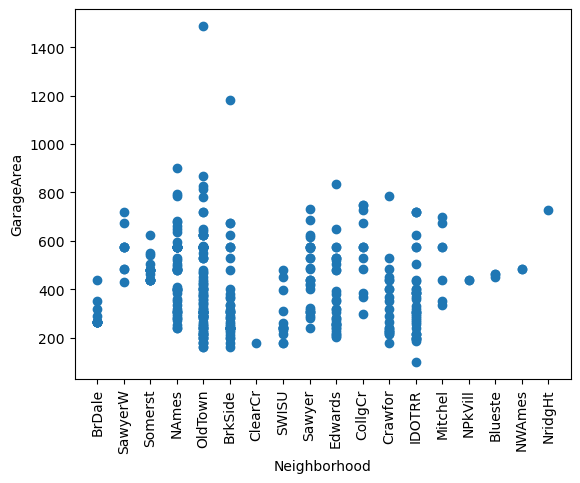

In [296]:
plt.scatter(det_test['Neighborhood'],det_test['GarageArea'])
plt.ylabel('GarageArea')
plt.xticks(rotation=90)
plt.xlabel('Neighborhood')

The `Neighborhood` column was the one with the most apparent influence on garage area, so I am going to use the median of the appropriate neighborhood to fill in the missing *GarageArea* value. 

In [297]:
det_test.loc[[1116]][['GarageArea','GarageCars','GarageType','Neighborhood']]

,GarageArea,GarageCars,GarageType,Neighborhood
1116,NaN,NaN,Detchd,IDOTRR


In [298]:
det_test[det_test['Neighborhood']=='IDOTRR']['GarageArea'].describe()

count     38.000000
mean     357.526316
std      158.198428
min      100.000000
25%      244.000000
50%      314.000000
75%      400.000000
max      720.000000
Name: GarageArea, dtype: float64

In [299]:
test_df.loc[1116, 'GarageArea'] = 314

The only combination that showed any meaningful correlation for the `GarageCars` column was the `GarageArea` column, which I can actually use now that I have filled in an estimate.

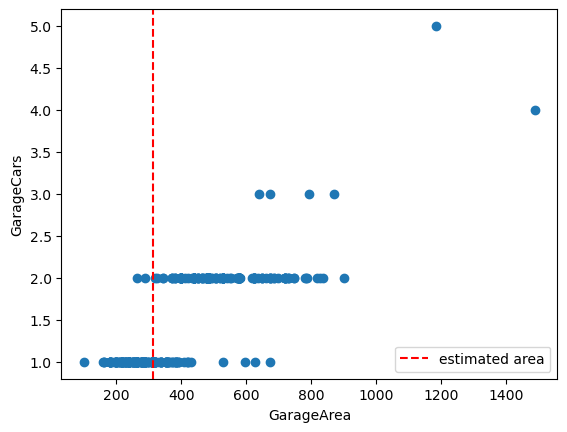

In [300]:
plt.scatter(det_test['GarageArea'],det_test['GarageCars'])
plt.axvline(x = 314, color = 'r',label='estimated area',linestyle='dashed')
plt.ylabel('GarageCars')
plt.xlabel('GarageArea')
plt.legend()

In [301]:
det_test['GarageCars'].value_counts()

GarageCars
1.0    197
2.0    188
3.0      4
5.0      1
4.0      1
Name: count, dtype: int64

The estimate value is solidly within the 1-car range, while it just touches the lower end of the 2-car range. Additionally, on the whole 1-car garages are slightly more likely. Therefore I am assigning a value of 1. 

In [302]:
test_df.loc[1116, 'GarageCars'] = 1

I can think of two options for the garage quality and condition; either go middle of the road and assume typical 'TA', or try to use the corresponding values for the whole house to see how the garage is usually scored for that level. 

In [303]:
test_df.loc[[666,1116]][['OverallQual','OverallCond','GarageQual','GarageCond']]

,OverallQual,OverallCond,GarageQual,GarageCond
666,6,8,NaN,NaN
1116,5,6,NaN,NaN


In [304]:
test_df[test_df['OverallQual']==6]['GarageQual'].value_counts()

GarageQual
TA    329
Fa     17
Gd      1
Name: count, dtype: int64

In [305]:
test_df[test_df['OverallQual']==5]['GarageQual'].value_counts()

GarageQual
TA    368
Fa     23
Gd      2
Po      1
Name: count, dtype: int64

In [306]:
test_df[test_df['OverallCond']==8]['GarageCond'].value_counts()

GarageCond
TA    65
Fa     3
Name: count, dtype: int64

In [307]:
test_df[test_df['OverallCond']==6]['GarageCond'].value_counts()

GarageCond
TA    257
Fa      6
Gd      2
Name: count, dtype: int64

It turns out the dominant garage value for each value is 'TA' anyways, so that is what I am going to be assigning both of these rows, in both the `GarageQual` and `GarageCond` columns.

In [308]:
test_df.loc[[666,1116], 'GarageQual'] = 'TA'
test_df.loc[[666,1116], 'GarageCond'] = 'TA'

In [309]:
test_df.loc[[666,1116]][['GarageArea','GarageCars','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']]

,GarageArea,GarageCars,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
666,360.0,1.0,Detchd,NaN,NaN,TA,TA
1116,314.0,1.0,Detchd,NaN,NaN,TA,TA


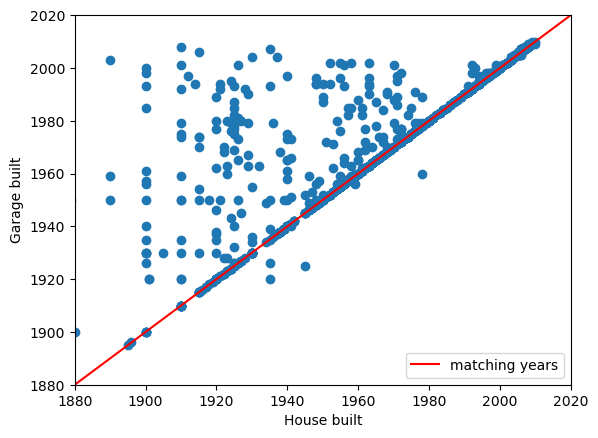

In [310]:
import numpy as np
plt.scatter(test_df['YearBuilt'],test_df['GarageYrBlt'])
plt.xticks(np.arange(1880,2040,20))
plt.yticks(np.arange(1880,2040,20))
plt.xlim(1880, 2020)
plt.ylim(1880, 2020)
plt.ylabel('Garage built')
plt.xlabel('House built')
plt.axline((0,0),slope=1,color='r',label='matching years')
plt.legend()

In [311]:
train_df['GarageType'] = train_df['GarageType'].fillna('None')
test_df['GarageType'] = test_df['GarageType'].fillna('None')

train_df['GarageYrBlt'] = train_df['GarageYrBlt'].fillna('None')
test_df['GarageYrBlt'] = test_df['GarageYrBlt'].fillna('None')

train_df['GarageFinish'] = train_df['GarageFinish'].fillna('None')
test_df['GarageFinish'] = test_df['GarageFinish'].fillna('None')

train_df['GarageQual'] = train_df['GarageQual'].fillna('None')
test_df['GarageQual'] = test_df['GarageQual'].fillna('None')

train_df['GarageCond'] = train_df['GarageCond'].fillna('None')
test_df['GarageCond'] = test_df['GarageCond'].fillna('None')

In [312]:
print(f'Missing basement finish 1: {len(train_df[train_df['BsmtFinType1'].isna()])}')
print(f'Missing basement finish 2: {len(train_df[train_df['BsmtFinType2'].isna()])}')
print(f'Missing basement exposure: {len(train_df[train_df['BsmtExposure'].isna()])}')
print(f'Missing basement quality: {len(train_df[train_df['BsmtQual'].isna()])}')
print(f'Missing basement condition: {len(train_df[train_df['BsmtCond'].isna()])}')

Missing basement finish 1: 37
Missing basement finish 2: 38
Missing basement exposure: 38
Missing basement quality: 37
Missing basement condition: 37


In [313]:
print(f'No basement area, missing all values: {len(train_df[(train_df['TotalBsmtSF']==0)&
    (train_df['BsmtFinType1'].isna())&
    (train_df['BsmtFinType2'].isna())&
    (train_df['BsmtExposure'].isna())&
    (train_df['BsmtQual'].isna())&
    (train_df['BsmtCond'].isna())])}')

No basement area, missing all values: 37


Most of the missing values are in cases where there is no basement, as shown by the 0 for total square footage. However:

In [314]:
display(train_df[(train_df['TotalBsmtSF']!=0)&
    (train_df['BsmtFinType2'].isna())][['TotalBsmtSF', 'BsmtFinType1', 'BsmtFinSF1',
'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtExposure', 'BsmtQual', 'BsmtCond']])
display(train_df[(train_df['TotalBsmtSF']!=0)&
    (train_df['BsmtExposure'].isna())][['TotalBsmtSF', 'BsmtFinType1',
'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond']])

,TotalBsmtSF,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtExposure,BsmtQual,BsmtCond
332,3206,GLQ,1124,NaN,479,1603,3206,No,Gd,TA


,TotalBsmtSF,BsmtFinType1,BsmtFinType2,BsmtExposure,BsmtQual,BsmtCond
948,936,Unf,Unf,NaN,Gd,TA


In [315]:
display(train_df['BsmtFinType2'].value_counts())
display(train_df['BsmtExposure'].value_counts())

BsmtFinType2
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64

BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: count, dtype: int64

In the case of row 332, the fact that the values for finish 1 and 2 are different implies that the finishes are different, but there's no way to know what *kind* of finish the second is. I am going to assign it 'Rec', as it is the most common value aside from unfinished, which I know it isn't in this case from looking at the square footage values. <p>
For row 948, I assume the missing value means there is no exposure, so I will be giving that the 'No' value from the documentation. 

In [316]:
train_df.loc[332, 'BsmtFinType2'] = 'Rec'
train_df.loc[948, 'BsmtExposure'] = 'No'

Now the rest can be filled.

In [317]:
train_df['BsmtFinType1'] = train_df['BsmtFinType1'].fillna('None')
train_df['BsmtFinType2'] = train_df['BsmtFinType2'].fillna('None')
train_df['BsmtExposure'] = train_df['BsmtExposure'].fillna('None')
train_df['BsmtQual'] = train_df['BsmtQual'].fillna('None')
train_df['BsmtCond'] = train_df['BsmtCond'].fillna('None')

There are extra issues with the test version of these columns.

In [318]:
print(f'Missing test basement values:')
print(f'Quality: {len(test_df[test_df['BsmtQual'].isna()])}')
print(f'Condition: {len(test_df[test_df['BsmtCond'].isna()])}')
print(f'Exposure: {len(test_df[test_df['BsmtExposure'].isna()])}')
print(f'Finish 1: {len(test_df[test_df['BsmtFinType1'].isna()])}')
print(f'Finish 1 area: {len(test_df[test_df['BsmtFinSF1'].isna()])}')
print(f'Finish 2: {len(test_df[test_df['BsmtFinType2'].isna()])}')
print(f'Finish 2 area: {len(test_df[test_df['BsmtFinSF2'].isna()])}')
print(f'Unfinished area: {len(test_df[test_df['BsmtUnfSF'].isna()])}')
print(f'Total area: {len(test_df[test_df['TotalBsmtSF'].isna()])}')
print(f'Full bath: {len(test_df[test_df['BsmtFullBath'].isna()])}')
print(f'Half bath:{len(test_df[test_df['BsmtHalfBath'].isna()])}')

Missing test basement values:
Quality: 44
Condition: 45
Exposure: 44
Finish 1: 42
Finish 1 area: 1
Finish 2: 42
Finish 2 area: 1
Unfinished area: 1
Total area: 1
Full bath: 2
Half bath:2


In [319]:
test_df[test_df['BsmtFinSF1'].isna()][['HouseStyle','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 
                    'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']]

,HouseStyle,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
660,1Story,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Given this row is a single story house, it does not have a basement, so all of these values would be the appropriate 0/None value. All of the single entries can be filled in based on this row. 

In [320]:
test_df['BsmtFinSF1'] = test_df['BsmtFinSF1'].fillna(0)
test_df['BsmtFinSF2'] = test_df['BsmtFinSF2'].fillna(0)
test_df['BsmtUnfSF'] = test_df['BsmtUnfSF'].fillna(0)
test_df['TotalBsmtSF'] = test_df['TotalBsmtSF'].fillna(0)

In [321]:
test_df[test_df['BsmtFullBath'].isna()][['HouseStyle', 'BsmtFullBath', 'BsmtHalfBath']]

,HouseStyle,BsmtFullBath,BsmtHalfBath
660,1Story,NaN,NaN
728,1Story,NaN,NaN


The same is true of the bathroom values; there is no basement so there can't be bathrooms.

In [322]:
test_df['BsmtFullBath'] = test_df['BsmtFullBath'].fillna(0)
test_df['BsmtHalfBath'] = test_df['BsmtHalfBath'].fillna(0)

In [323]:
test_df[
    (test_df['TotalBsmtSF']!=0)&(test_df['BsmtQual'].isna())
][['TotalBsmtSF', 'BsmtQual', 'BsmtCond', 'BsmtExposure']]

,TotalBsmtSF,BsmtQual,BsmtCond,BsmtExposure
757,173.0,NaN,Fa,No
758,356.0,NaN,TA,No


As there is no way to know the quality (which corresponds to the height of the basement), I am going to assign these 'TA' for 'typical'. 

In [324]:
test_df.loc[((test_df[ # select
    (test_df['TotalBsmtSF']!=0)& # total area is not 0 AND
    (test_df['BsmtQual'].isna()) # quality is NA
].index).tolist()), 'BsmtQual'] = 'TA'

In [325]:
print(f'Missing values vs basement area \nQuality: {test_df[test_df['BsmtQual'].isna()][['TotalBsmtSF']].value_counts()}')
print(f'\nCondition: {test_df[test_df['BsmtCond'].isna()][['TotalBsmtSF']].value_counts()}')
print(f'\nExposure: {test_df[test_df['BsmtExposure'].isna()][['TotalBsmtSF']].value_counts()}')
print(f'\nFinish type 1: {test_df[test_df['BsmtFinType1'].isna()][['TotalBsmtSF']].value_counts()}')
print(f'\nFinish type 2: {test_df[test_df['BsmtFinType2'].isna()][['TotalBsmtSF']].value_counts()}')

Missing values vs basement area 
Quality: TotalBsmtSF
0.0            42
Name: count, dtype: int64

Condition: TotalBsmtSF
0.0            42
995.0           1
1127.0          1
1426.0          1
Name: count, dtype: int64

Exposure: TotalBsmtSF
0.0            42
725.0           1
1595.0          1
Name: count, dtype: int64

Finish type 1: TotalBsmtSF
0.0            42
Name: count, dtype: int64

Finish type 2: TotalBsmtSF
0.0            42
Name: count, dtype: int64


In [326]:
test_df['BsmtQual'] = test_df['BsmtQual'].fillna('None')
test_df['BsmtFinType1'] = test_df['BsmtFinType1'].fillna('None')
test_df['BsmtFinType2'] = test_df['BsmtFinType2'].fillna('None')

In [327]:
test_df[
    (test_df['TotalBsmtSF']>0)&
    (test_df['BsmtCond'].isna())
][['MSSubClass', 'HouseStyle', 'BsmtQual', 'BsmtCond', 'BsmtUnfSF', 'TotalBsmtSF']]

,MSSubClass,HouseStyle,BsmtQual,BsmtCond,BsmtUnfSF,TotalBsmtSF
580,20,1Story,Gd,NaN,0.0,1426.0
725,20,1Story,TA,NaN,94.0,1127.0
1064,80,SLvl,TA,NaN,240.0,995.0


In [328]:
test_df['BsmtCond'].value_counts()

BsmtCond
TA    1295
Fa      59
Gd      57
Po       3
Name: count, dtype: int64

This shows that there are mismatches between the values related to the number of stories and the presence of a basement, but ignoring that for now, with no direct way to decide on the condition of the basement, I am going to use 'TA', as it is 'typical' and also the most common. 

In [329]:
test_df.loc[((test_df[ # select
    (test_df['TotalBsmtSF']!=0)& # total area is not 0 AND
    (test_df['BsmtCond'].isna()) # condition is NA
].index).tolist()), 'BsmtCond'] = 'TA'

In [330]:
test_df[test_df['BsmtCond'].isna()]['TotalBsmtSF'].value_counts()

TotalBsmtSF
0.0    42
Name: count, dtype: int64

Since all of these are rows where there is no basement, they can be filled with 'None'.

In [331]:
test_df['BsmtCond'] = test_df['BsmtCond'].fillna('None')

In [332]:
test_df[
    (test_df['TotalBsmtSF']!=0)&
    (test_df['BsmtExposure'].isna())
][['HouseStyle', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'TotalBsmtSF']]

,HouseStyle,BsmtQual,BsmtCond,BsmtExposure,TotalBsmtSF
27,1Story,Gd,TA,NaN,1595.0
888,2Story,Gd,TA,NaN,725.0


Again, I am assuming that missing values correspond to no exposure, given that these rows have basements.

In [333]:
test_df.loc[((test_df[ # select
    (test_df['TotalBsmtSF']!=0)& # total area is not 0 AND
    (test_df['BsmtExposure'].isna()) # exposure is NA
].index).tolist()), 'BsmtExposure'] = 'No'

In [334]:
test_df[test_df['BsmtExposure'].isna()][['TotalBsmtSF']].value_counts()

TotalBsmtSF
0.0            42
Name: count, dtype: int64

The rest of these do not have a basement, so they get filled with 'None'.

In [335]:
test_df['BsmtExposure'] = test_df['BsmtExposure'].fillna('None')

In [336]:
print(f'Missing fireplace quality: \nTrain: {len(train_df[train_df['FireplaceQu'].isna()])}')
print(f'Test: {len(test_df[test_df['FireplaceQu'].isna()])}')

Missing fireplace quality: 
Train: 690
Test: 730


In [337]:
print(f'0 fireplaces, missing quality: \nTrain: {len(train_df[(train_df['FireplaceQu'].isna())&(train_df['Fireplaces']==0)])}')
print(f'Test: {len(test_df[(test_df['FireplaceQu'].isna())&(test_df['Fireplaces']==0)])}')

0 fireplaces, missing quality: 
Train: 690
Test: 730


Given that all NAs are associated with there being no fireplace, the NAs are being filled with 'None'.

In [338]:
train_df['FireplaceQu'] = train_df['FireplaceQu'].fillna('None')
test_df['FireplaceQu'] = test_df['FireplaceQu'].fillna('None')

In [339]:
print(f'Missing pool quality: \nTrain: {len(train_df[train_df['PoolQC'].isna()])}')
print(f'Test: {len(test_df[test_df['PoolQC'].isna()])}')
print(f'\nMissing quality and pool area 0: \nTrain: {len(train_df[(train_df['PoolArea']==0)&(train_df['PoolQC'].isna())])}')
print(f'Test: {len(test_df[(test_df['PoolArea']==0)&(test_df['PoolQC'].isna())])}')

Missing pool quality: 
Train: 1453
Test: 1456

Missing quality and pool area 0: 
Train: 1453
Test: 1453


In [340]:
test_df[(test_df['PoolArea']!=0)&(test_df['PoolQC'].isna())][['PoolArea','PoolQC']]

,PoolArea,PoolQC
960,368,NaN
1043,444,NaN
1139,561,NaN


There is no way to really know what the pool quality value actually is, so I am going to assign the 'Average/Typical' value, as it is the middle value both descriptively and in terms of encoding. 

In [341]:
test_df.loc[((test_df[ # select
    (test_df['PoolArea']!=0)& # pool area is not 0 AND
    (test_df['PoolQC'].isna()) # pool quality is NA
].index).tolist()), 'PoolQC'] = 'TA'

The rest can be filled in with 'None', as they correspond to 0s in the area column. 

In [342]:
train_df['PoolQC'] = train_df['PoolQC'].fillna('None')
test_df['PoolQC'] = test_df['PoolQC'].fillna('None')

Per the documentation: "Home functionality (Assume typical unless deductions are warranted)"<br>
Therefore both empty values can be filled with `Typ`. 

In [343]:
test_df['Functional'] = test_df['Functional'].fillna('Typ')

In [344]:
print(train_df['Electrical'].isna().value_counts(),'\n')
print(train_df[train_df['Electrical'].isna()][['Electrical','YearBuilt', 'HouseStyle']])

Electrical
False    1459
True        1
Name: count, dtype: int64 

     Electrical  YearBuilt HouseStyle
1379        NaN       2006       SLvl


In [345]:
print(f'Train: {train_df['Electrical'].value_counts()},\n')
print(f'Test: {test_df['Electrical'].value_counts()} \n')

Train: Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64,

Test: Electrical
SBrkr    1337
FuseA      94
FuseF      23
FuseP       5
Name: count, dtype: int64 



Rather than drop this row, I'm going to use the fact that the vast majority of data (91.4% of train, 91.6% of test) have the 'SBrkr' value to assume that's what belongs here; it would be strange for a home built in 2006 to actually have no electrical at all. <p>
As there are no missing values for the `Electrical` column in the test set, this is the only strange case I need to deal with. 

In [346]:
train_df['Electrical'] = train_df['Electrical'].fillna('SBrkr')

In [347]:
train_df.isna().value_counts()

Id     MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  PoolQC  Fence  MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice
False  False       False     False        False    False   Fal

At this point, the only remaining NA values in the train dataframe are in the `MiscFeature` column. I could fill these with 'None', but I plan to One Hot Encode this column, and don't want to add a feature I will later need to remove, so this column is staying as is. <p>
However, there are columns in the test set that have NAs that did not in the train set that still need to be dealt with.

In [348]:
test_df[test_df['MSZoning'].isna()][['MSZoning','Neighborhood','MSSubClass','BldgType']]

,MSZoning,Neighborhood,MSSubClass,BldgType
455,NaN,IDOTRR,30,1Fam
756,NaN,IDOTRR,20,1Fam
790,NaN,IDOTRR,70,1Fam
1444,NaN,Mitchel,20,1Fam


I'm going to use the `Neighborhood`, `MSSubClass` and `BldgType` values to decide what to put for each of these missing `MSZoning` values. My logic is that by looking at the trends based on the location of the property, and the type of building, I can be more sure of what kind of lot it would be on. 

In [349]:
print('Row 756; \nNeighborhood - IDOTRR, MSSubClass - 20, BldgType - 1Fam')
print(f'Train: {train_df[(train_df['Neighborhood']=='IDOTRR')&(train_df['MSSubClass']==20)&
    (train_df['BldgType']=='1Fam')]['MSZoning'].value_counts()}\n')
print(f'Test: {test_df[(test_df['Neighborhood']=='IDOTRR')&(test_df['MSSubClass']==20)&
    (test_df['BldgType']=='1Fam')]['MSZoning'].value_counts()}')
print('\n\nRow 1444; \nNeighborhood - Mitchel, MSSubClass - 20, BldgType - 1Fam')
print(f'Train: {train_df[(train_df['Neighborhood']=='Mitchel')&(train_df['MSSubClass']==20)&
    (train_df['BldgType']=='1Fam')]['MSZoning'].value_counts()}\n')
print(f'Test: {test_df[(test_df['Neighborhood']=='Mitchel')&(test_df['MSSubClass']==20)&
    (test_df['BldgType']=='1Fam')]['MSZoning'].value_counts()}')

Row 756; 
Neighborhood - IDOTRR, MSSubClass - 20, BldgType - 1Fam
Train: MSZoning
C (all)    2
Name: count, dtype: int64

Test: MSZoning
C (all)    1
Name: count, dtype: int64


Row 1444; 
Neighborhood - Mitchel, MSSubClass - 20, BldgType - 1Fam
Train: MSZoning
RL    23
Name: count, dtype: int64

Test: MSZoning
RL    30
Name: count, dtype: int64


For both of these rows, the specific combinations of parameters only have one possible value in the `MSZoning` column, so those are what I am going to use. <p>
The other two rows both have two possible options:

In [350]:
print('Row 455; \nNeighborhood - IDOTRR, MSSubClass - 30, BldgType - 1Fam')
print(f'Train: {train_df[(train_df['Neighborhood']=='IDOTRR')&(train_df['MSSubClass']==30)&
    (train_df['BldgType']=='1Fam')]['MSZoning'].value_counts()}\n')
print(f'Test: {test_df[(test_df['Neighborhood']=='IDOTRR')&(test_df['MSSubClass']==30)&
    (test_df['BldgType']=='1Fam')]['MSZoning'].value_counts()}')

Row 455; 
Neighborhood - IDOTRR, MSSubClass - 30, BldgType - 1Fam
Train: MSZoning
RM         9
C (all)    2
Name: count, dtype: int64

Test: MSZoning
RM         12
C (all)     5
Name: count, dtype: int64


Both sets have the 'RM' value occuring more often, with the distribution across all of the data being 3:1 in that direction, so that is what I am going to assign. 

In [351]:
print('Row 790; \nNeighborhood - IDOTRR, MSSubClass - 70, BldgType - 1Fam')
print(f'Train: {train_df[(train_df['Neighborhood']=='IDOTRR')&(train_df['MSSubClass']==70)&
    (train_df['BldgType']=='1Fam')]['MSZoning'].value_counts()}\n')
print(f'Test: {test_df[(test_df['Neighborhood']=='IDOTRR')&(test_df['MSSubClass']==70)&
    (test_df['BldgType']=='1Fam')]['MSZoning'].value_counts()}')

Row 790; 
Neighborhood - IDOTRR, MSSubClass - 70, BldgType - 1Fam
Train: MSZoning
RM         3
C (all)    1
Name: count, dtype: int64

Test: MSZoning
RM         5
C (all)    2
Name: count, dtype: int64


Again, both sets have the 'RM' value occuring more often, with the distribution across both sets this time being ~2.6:1. I'm going to assign 'RM' again.

In [352]:
test_df.loc[756,'MSZoning'] = 'C (all)'
test_df.loc[1444,'MSZoning'] = 'RL'
test_df.loc[455,'MSZoning'] = 'RM'
test_df.loc[790,'MSZoning'] = 'RM'

Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only

In [353]:
test_df[test_df['Utilities'].isna()][['Utilities','Neighborhood','Electrical','Heating','BsmtFullBath', 'BsmtHalfBath', 'FullBath','HalfBath']]

,Utilities,Neighborhood,Electrical,Heating,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath
455,NaN,IDOTRR,FuseA,GasA,0.0,0.0,1,0
485,NaN,Gilbert,FuseA,GasA,0.0,0.0,1,0


In [354]:
print(f'Train \n{train_df['Utilities'].value_counts()}')
print(f'\nTest \n{test_df['Utilities'].value_counts()}')
print(f'\nNeighborhood: IDOTRR \n{train_df[train_df['Neighborhood']=='IDOTRR']['Utilities'].value_counts()}')
print(f'\nNeighborhood: Gilbert \n{train_df[train_df['Neighborhood']=='Gilbert']['Utilities'].value_counts()}')

Train 
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

Test 
Utilities
AllPub    1457
Name: count, dtype: int64

Neighborhood: IDOTRR 
Utilities
AllPub    37
Name: count, dtype: int64

Neighborhood: Gilbert 
Utilities
AllPub    79
Name: count, dtype: int64


There is only one row with a value that isn't 'AllPub', and it isn't in either of the neighborhoods in question, so these two rows will be filled with 'AllPub'. 

In [355]:
test_df.loc[455,'Utilities'] = 'AllPub'
test_df.loc[485,'Utilities'] = 'AllPub'

In [356]:
test_df[test_df['Exterior1st'].isna()][['Exterior1st','Exterior2nd','Neighborhood','BldgType','MSSubClass','MSZoning']]

,Exterior1st,Exterior2nd,Neighborhood,BldgType,MSSubClass,MSZoning
691,NaN,NaN,Edwards,1Fam,30,RL


In [357]:
print(f'Train: \n{train_df[train_df['Neighborhood']=='Edwards']['Exterior1st'].value_counts()}')
print(f'\n{train_df[train_df['Neighborhood']=='Edwards']['Exterior2nd'].value_counts()}')

Train: 
Exterior1st
Wd Sdng    23
MetalSd    23
VinylSd    20
HdBoard     8
WdShing     6
Stucco      6
Plywood     5
AsbShng     3
BrkComm     2
CemntBd     2
AsphShn     1
BrkFace     1
Name: count, dtype: int64

Exterior2nd
Wd Sdng    24
VinylSd    21
MetalSd    21
Plywood    10
HdBoard     7
Stucco      6
Wd Shng     4
Brk Cmn     2
CmentBd     2
AsbShng     2
AsphShn     1
Name: count, dtype: int64


In [358]:
print(f'Test: \n{test_df[test_df['Neighborhood']=='Edwards']['Exterior1st'].value_counts()}')
print(f'\n{test_df[test_df['Neighborhood']=='Edwards']['Exterior2nd'].value_counts()}')

Test: 
Exterior1st
Wd Sdng    22
VinylSd    18
MetalSd    14
HdBoard    13
Plywood    11
WdShing     7
AsbShng     4
BrkFace     3
CemntBd     1
Name: count, dtype: int64

Exterior2nd
Wd Sdng    24
Plywood    20
VinylSd    17
MetalSd    14
HdBoard     8
Wd Shng     6
AsbShng     2
CmentBd     1
Stucco      1
Name: count, dtype: int64


There is no clear pattern for either of the exterior values within the neighborhood in either of the sets, and there is no other way to tell what the exterior is.

In [359]:
print(f"Rows with 'Other' \nTrain:")
display(train_df[(train_df['Exterior1st']=='Other')|(train_df['Exterior2nd']=='Other')][['Exterior1st','Exterior2nd']])
print(f"Test:")
display(test_df[(test_df['Exterior1st']=='Other')|(test_df['Exterior2nd']=='Other')][['Exterior1st','Exterior2nd']])

Rows with 'Other' 
Train:


,Exterior1st,Exterior2nd
595,VinylSd,Other


Test:


,Exterior1st,Exterior2nd


The 'Other' value is virtually never used, but in the interest of not dropping the row, I think it is the only option.

In [360]:
test_df.loc[691,'Exterior1st'] = 'Other'
test_df.loc[691,'Exterior2nd'] = 'Other'

In [361]:
test_df[test_df['SaleType'].isna()][['SaleType', 'SaleCondition', 'Neighborhood']]

,SaleType,SaleCondition,Neighborhood
1029,NaN,Normal,Sawyer


In [362]:
print(f'SaleCondition: Normal \nTrain: {train_df[train_df['SaleCondition']=='Normal'][['SaleType']].value_counts()} \n')
print(f'Test: {test_df[test_df['SaleCondition']=='Normal'][['SaleType']].value_counts()}')

SaleCondition: Normal 
Train: SaleType
WD          1160
COD           19
ConLD          6
ConLw          5
ConLI          4
CWD            2
Con            2
Name: count, dtype: int64 

Test: SaleType
WD          1154
COD           20
ConLD         15
CWD            8
Con            2
ConLw          2
ConLI          1
Oth            1
Name: count, dtype: int64


96.8% of train and 95.9% of test have the 'WD' value paired with the 'Normal' value. When looking at the specific 'Sawyer' neighborhood:

In [363]:
print(f'Train: \n{train_df[(train_df['Neighborhood']=='Sawyer')&(train_df['SaleCondition']=='Normal')]['SaleType'].value_counts()}')
print(f'\nTest: \n{test_df[(test_df['Neighborhood']=='Sawyer')&(test_df['SaleCondition']=='Normal')]['SaleType'].value_counts()}')

Train: 
SaleType
WD    67
Name: count, dtype: int64

Test: 
SaleType
WD     65
COD     2
Name: count, dtype: int64


There is 100% of train and 97% of test with the 'WD' value. As it is the overwhelming majority, that is what I am going to assign. 

In [364]:
test_df.loc[1029, 'SaleType'] = 'WD'

'OverallQual', 'OverallCond', 
 '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'KitchenAbvGr', 'KitchenQual',

In [365]:
test_df[test_df['KitchenQual'].isna()][[ 
'KitchenAbvGr', 'KitchenQual', 'OverallQual', 'OverallCond', 'Neighborhood']]

,KitchenAbvGr,KitchenQual,OverallQual,OverallCond,Neighborhood
95,1,NaN,5,3,ClearCr


In [366]:
print(f'KitchenQual matching on OverallQual')
print(f'Train: \n{train_df[(train_df['OverallQual']==5)][['KitchenQual']].value_counts()}')
print(f'\nTest: {test_df[(test_df['OverallQual']==5)][['KitchenQual']].value_counts()}')

KitchenQual matching on OverallQual
Train: 
KitchenQual
TA             320
Gd              60
Fa               9
Ex               8
Name: count, dtype: int64

Test: KitchenQual
TA             342
Gd              66
Fa              12
Ex               7
Name: count, dtype: int64


In [367]:
print(f'KitchenQual matching on OverallCond')
print(f'Train: \n{train_df[(train_df['OverallCond']==3)][['KitchenQual']].value_counts()}')
print(f'\nTest: \n{test_df[(test_df['OverallCond']==3)][['KitchenQual']].value_counts()}')

KitchenQual matching on OverallCond
Train: 
KitchenQual
TA             21
Fa              3
Gd              1
Name: count, dtype: int64

Test: 
KitchenQual
TA             19
Fa              3
Gd              2
Name: count, dtype: int64


Pairing on `OverallQual`, 80.6% of train and 80% of test with the same value have the 'TA' value for the kitchen, and pairing on `OverallCond` has 84% and 79.2% for train and test respectively. (I am not going by neighborhood because there is very little data if I do that.) As 'TA' means 'typical', I am using that as a best guess.

In [368]:
test_df.loc[95, 'KitchenQual'] = 'TA'

At this point, the only column with NAs is, again, the `MiscFeature` column, which I am still leaving as is, to be OneHot Encoded later.

Because there are over 1,400 data points in each set, and only a handful of rows where I've had to make assumptions, those assumptions shouldn't make a huge impact on the distribution of the data. However, I might still make two versions of the data to run; one with this cleaning, and one with the rows where assumptions were required dropped, in order to compare them.

### Remove outliers<p>
Using thresholds from previous notebook to remove outliers from the training set.<p>
Checking how many rows are included:

In [369]:
train_df[
    (train_df['LotFrontage']>250)|
    (train_df['LotArea']>140000)|
    (train_df['BsmtFinSF1']>4000)|
    (train_df['BsmtFinSF2']>1300)|
    (train_df['TotalBsmtSF']>5000)|
    (train_df['1stFlrSF']>4000)|
    (train_df['GrLivArea']>5000)|
    (train_df['EnclosedPorch']>500)|
    (train_df['MiscVal']>6000)|
    (train_df['SalePrice']>700000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,RL,174.0,25419,Pave,None,Reg,Lvl,AllPub,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000
249,250,50,RL,0.0,159000,Pave,None,IR2,Low,AllPub,...,0,None,None,Shed,500,6,2007,WD,Normal,277000
313,314,20,RL,150.0,215245,Pave,None,IR3,Low,AllPub,...,0,None,None,NaN,0,6,2009,WD,Normal,375000
322,323,60,RL,86.0,10380,Pave,None,IR1,Lvl,AllPub,...,0,None,MnPrv,NaN,0,8,2007,WD,Normal,301000
335,336,190,RL,0.0,164660,Grvl,None,IR1,HLS,AllPub,...,0,None,None,Shed,700,8,2008,WD,Normal,228950
346,347,20,RL,0.0,12772,Pave,None,IR1,Lvl,AllPub,...,0,None,None,Gar2,15500,4,2007,WD,Normal,151500
691,692,60,RL,104.0,21535,Pave,None,IR1,Lvl,AllPub,...,0,None,None,NaN,0,1,2007,WD,Normal,755000
934,935,20,RL,313.0,27650,Pave,None,IR2,HLS,AllPub,...,0,None,None,NaN,0,11,2008,WD,Normal,242000
1182,1183,60,RL,160.0,15623,Pave,None,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1230,1231,90,RL,0.0,18890,Pave,None,IR1,Lvl,AllPub,...,0,None,None,Gar2,8300,8,2007,WD,Normal,190000


Less than 1% of the total rows are above the given thresholds, which is a safe amount to drop.

In [370]:
train_cleaned = train_df.drop(train_df[
    (train_df['LotFrontage']>250)|
    (train_df['LotArea']>140000)|
    (train_df['BsmtFinSF1']>4000)|
    (train_df['BsmtFinSF2']>1300)|
    (train_df['TotalBsmtSF']>5000)|
    (train_df['1stFlrSF']>4000)|
    (train_df['GrLivArea']>5000)|
    (train_df['EnclosedPorch']>500)|
    (train_df['MiscVal']>6000)|
    (train_df['SalePrice']>700000)].index)

In [371]:
import seaborn as sns
import matplotlib.pyplot as plt

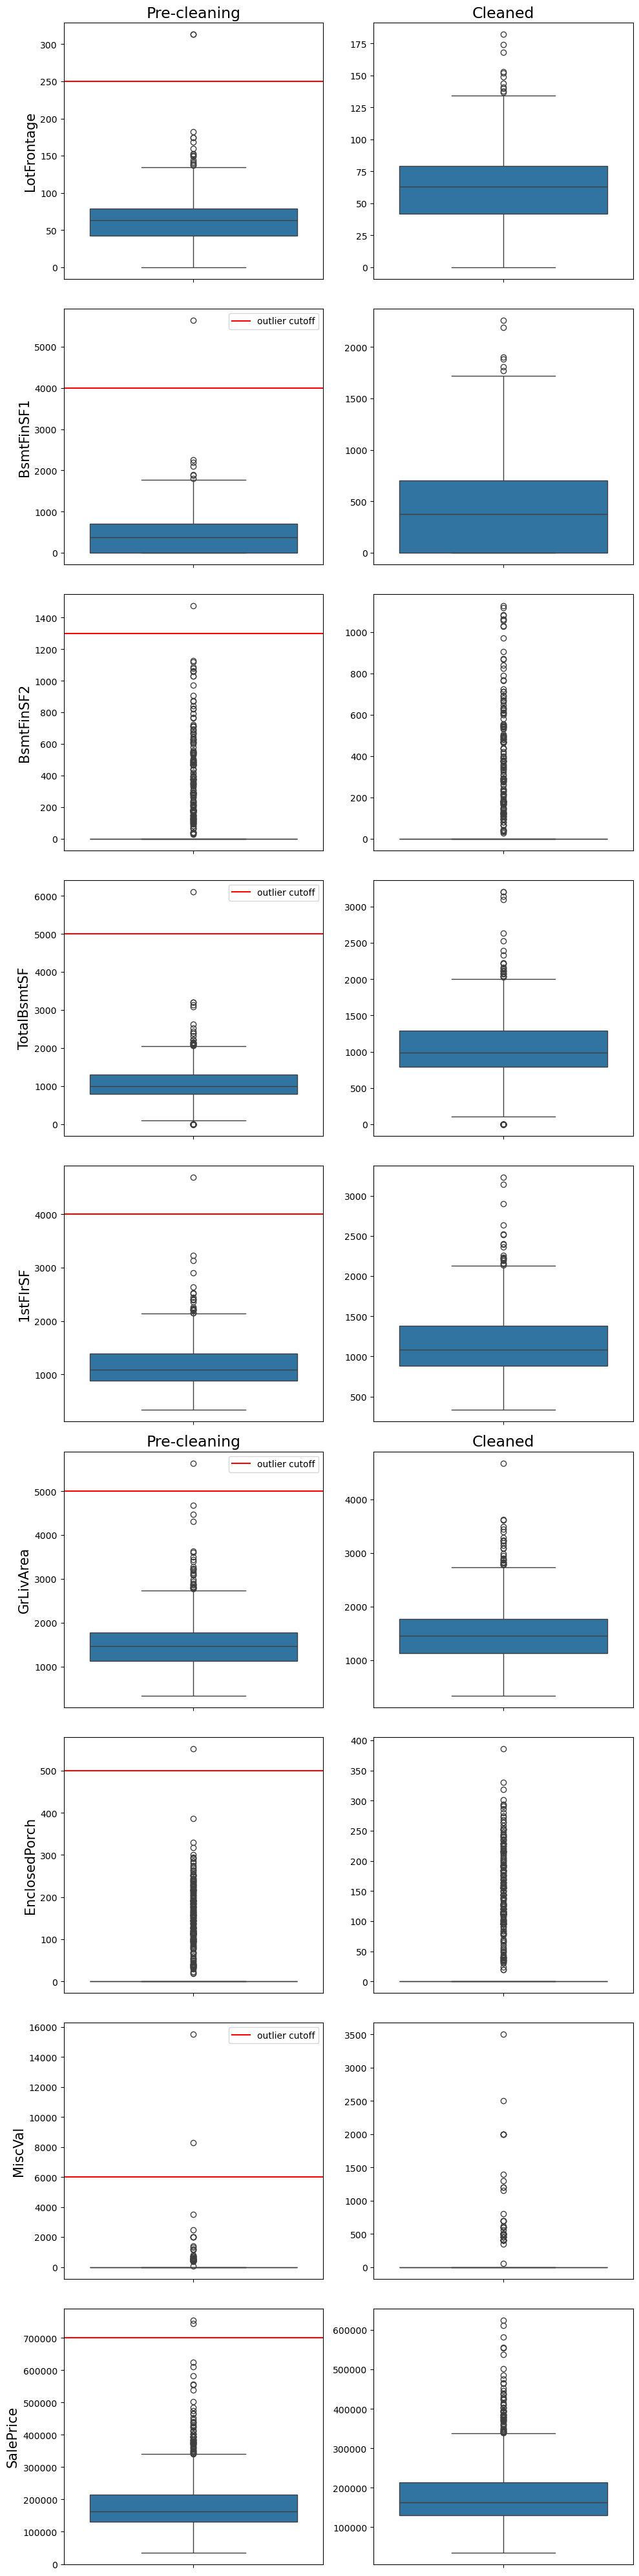

In [372]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,1)
sns.boxplot(train_df['LotFrontage'])
plt.axhline(y=250,color='red')
plt.title('Pre-cleaning',fontsize=17)
plt.ylabel('LotFrontage',fontsize=15)

plt.subplot(9,2,2)
sns.boxplot(train_cleaned['LotFrontage'])
plt.title('Cleaned',fontsize=17)
plt.ylabel('')

plt.subplot(9,2,3)
sns.boxplot(train_df['BsmtFinSF1'])
plt.axhline(y=4000,color='red',label='outlier cutoff')
plt.ylabel('BsmtFinSF1',fontsize=15)
plt.legend()

plt.subplot(9,2,4)
sns.boxplot(train_cleaned['BsmtFinSF1'])
plt.ylabel('')

plt.subplot(9,2,5)
sns.boxplot(train_df['BsmtFinSF2'])
plt.axhline(y=1300,color='red')
plt.ylabel('BsmtFinSF2',fontsize=15)

plt.subplot(9,2,6)
sns.boxplot(train_cleaned['BsmtFinSF2'])
plt.ylabel('')

plt.subplot(9,2,7)
sns.boxplot(train_df['TotalBsmtSF'])
plt.axhline(y=5000,color='red',label='outlier cutoff')
plt.ylabel('TotalBsmtSF',fontsize=15)
plt.legend()

plt.subplot(9,2,8)
sns.boxplot(train_cleaned['TotalBsmtSF'])
plt.ylabel('')

plt.subplot(9,2,9)
sns.boxplot(train_df['1stFlrSF'])
plt.axhline(y=4000,color='red')
plt.ylabel('1stFlrSF',fontsize=15)

plt.subplot(9,2,10)
sns.boxplot(train_cleaned['1stFlrSF'])
plt.ylabel('')

plt.subplot(9,2,11)
sns.boxplot(train_df['GrLivArea'])
plt.axhline(y=5000,color='red',label='outlier cutoff')
plt.title('Pre-cleaning',fontsize=17)
plt.ylabel('GrLivArea',fontsize=15)
plt.legend()

plt.subplot(9,2,12)
sns.boxplot(train_cleaned['GrLivArea'])
plt.title('Cleaned',fontsize=17)
plt.ylabel('')

plt.subplot(9,2,13)
sns.boxplot(train_df['EnclosedPorch'])
plt.axhline(y=500,color='red')
plt.ylabel('EnclosedPorch',fontsize=15)

plt.subplot(9,2,14)
sns.boxplot(train_cleaned['EnclosedPorch'])
plt.ylabel('')

plt.subplot(9,2,15)
sns.boxplot(train_df['MiscVal'])
plt.axhline(y=6000,color='red',label='outlier cutoff')
plt.ylabel('MiscVal',fontsize=15)
plt.legend()

plt.subplot(9,2,16)
sns.boxplot(train_cleaned['MiscVal'])
plt.ylabel('')

plt.subplot(9,2,17)
sns.boxplot(train_df['SalePrice'])
plt.axhline(y=700000,color='red')
plt.ylabel('SalePrice',fontsize=15)

plt.subplot(9,2,18)
sns.boxplot(train_cleaned['SalePrice'])
plt.ylabel('')

plt.tight_layout()

Creating pickles of the cleaned data:

In [373]:
train_cleaned.to_pickle('../pickles/cleaned/train_cleaned')
test_df.to_pickle('../pickles/cleaned/test_cleaned')